In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import warnings#to cancel any warnings
warnings.filterwarnings('ignore')

In [5]:
def wrangle(data_path):
    data = pd.read_csv(data_path)

    # Displaying the initial observations
    print("Initial Observations:")
    print(data.head(10))
    print()

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(data.info(show_counts=True))
    print()

    # Check for duplicated rows
    print("Number of duplicated rows:", data.duplicated().sum())
    print()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(data.describe().transpose())
    print()

    return data

# Example usage
data_path = "IRIS.csv"
data = wrangle(data_path)


Initial Observations:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

Info about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_

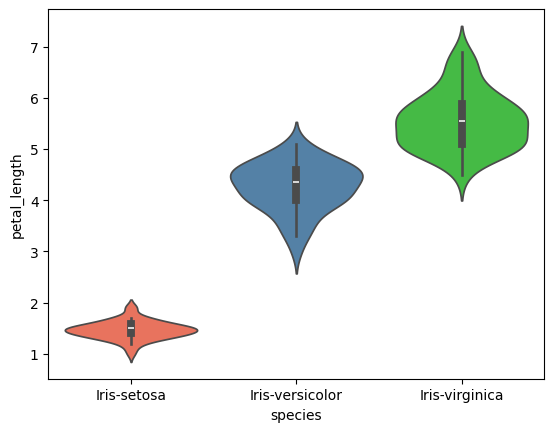

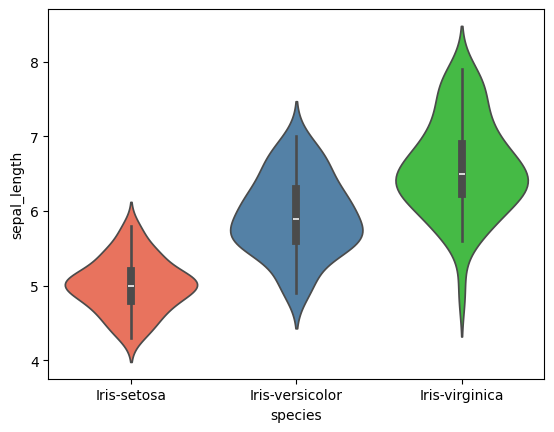

In [9]:
sns.violinplot(x="species", y="petal_length", data=data, palette=['#FF6347', '#4682B4', '#32CD32'])
plt.show()

sns.violinplot(x="species", y="sepal_length", data=data,palette=['#FF6347', '#4682B4', '#32CD32'])
plt.show()

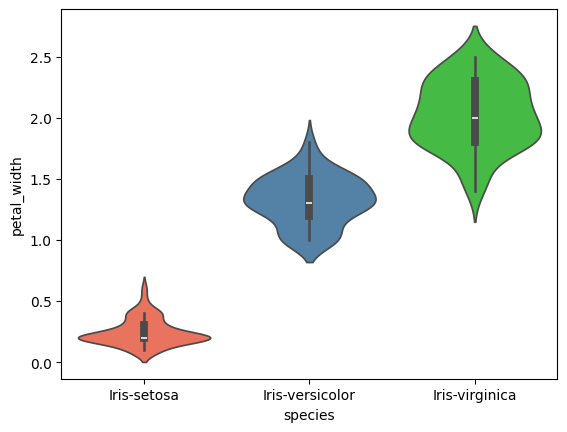

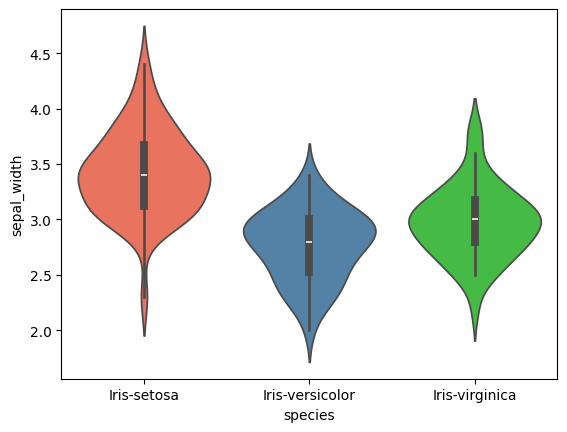

In [10]:
sns.violinplot(x="species", y="petal_width", data=data,palette=['#FF6347', '#4682B4', '#32CD32'])
plt.show()

sns.violinplot(x="species", y="sepal_width", data=data,palette=['#FF6347', '#4682B4', '#32CD32'])
plt.show()

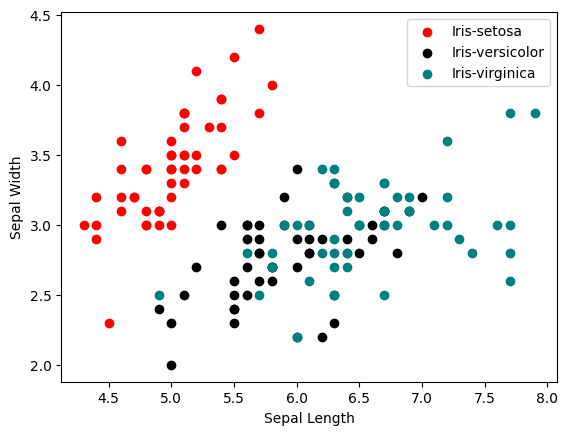

In [11]:
colors=['red','Black','teal']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

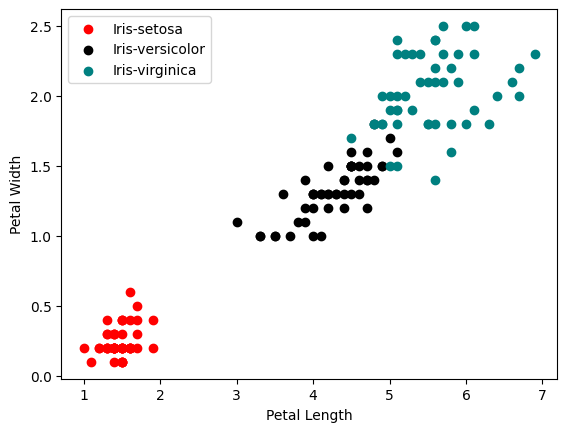

In [ ]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

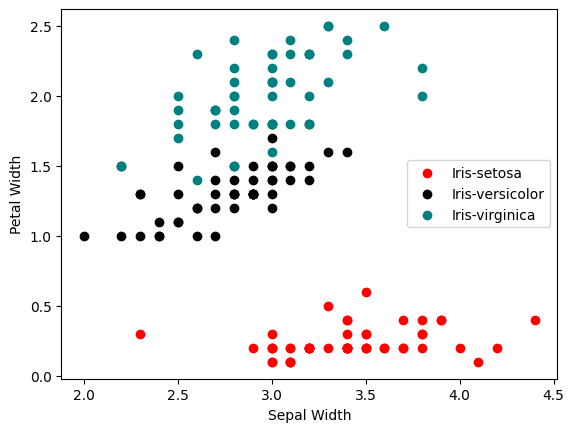

In [ ]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

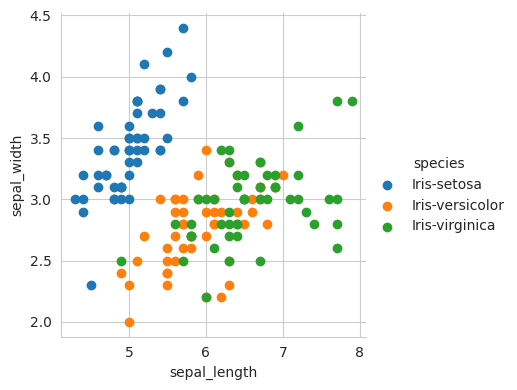

In [44]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

# Build Model

In [93]:
X = data.drop(['species'], axis=1)
y = data['species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(150, 4)
(150,)


# implementation and evaluation of three different classification algorithms: Logistic Regression,SVM , and Gaussian Naive Bayes.

In [95]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print("Logistic Regression Accuracy:", acc_log)

# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
print("SVM Accuracy:", acc_svc)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred_gaussian = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
print("Gaussian Naive Bayes Accuracy:", acc_gaussian)

Logistic Regression Accuracy: 97.5
SVM Accuracy: 97.5
Gaussian Naive Bayes Accuracy: 95.0


In [96]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression',"GaussianNB"],
    'Score': [acc_svc, acc_log,acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,97.5
1,Logistic Regression,97.5
2,GaussianNB,95.0


# SVM & Logistic Regression is the most accurate (97.5%)

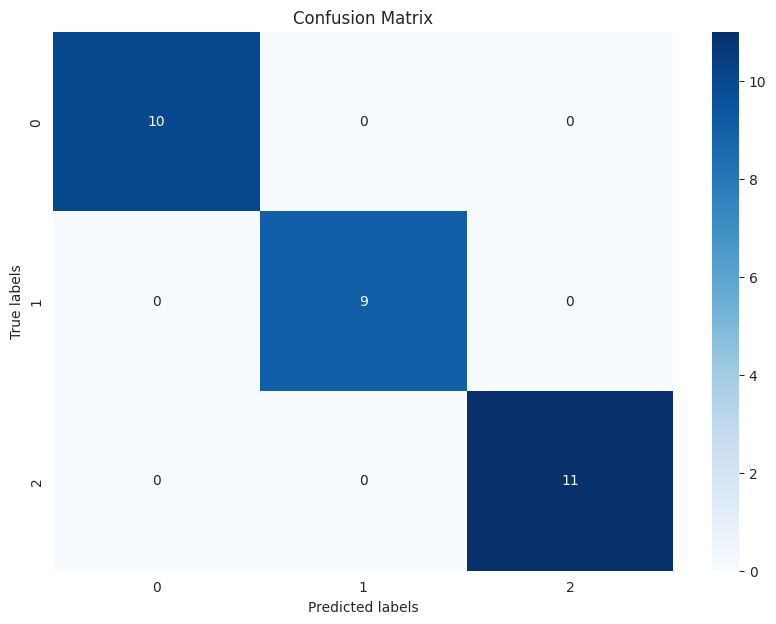

In [80]:
y_pred = svc.predict(x_test)
# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()